<a href="https://colab.research.google.com/github/74527mohammad/Python/blob/main/SLR_Salary_assngmnt_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [170]:
data = pd.read_csv("/content/salary_data_SLR.csv")

In [171]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

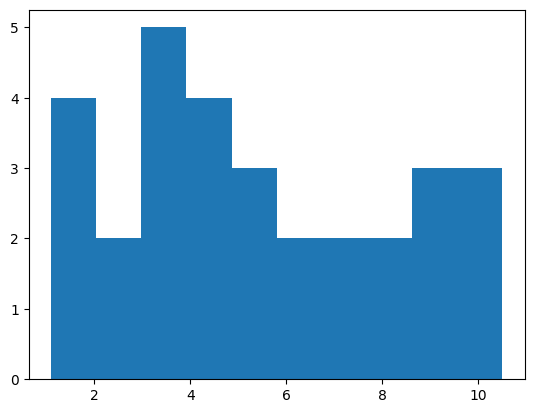

In [172]:
plt.hist(data["YearsExperience"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e4729d459f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e4729920250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e4729d45f00>],
 'medians': [<matplotlib.lines.Line2D at 0x7e4729920790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e4729920a30>],
 'means': []}

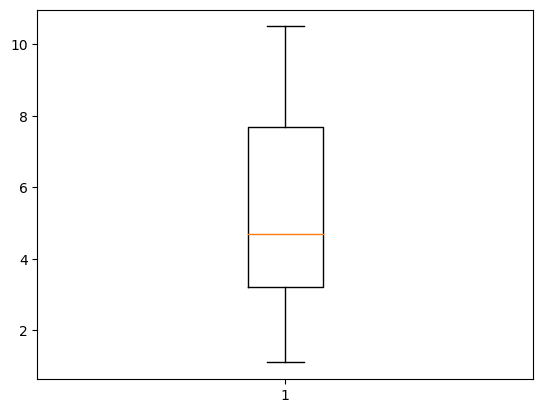

In [173]:
plt.boxplot(data["YearsExperience"])

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

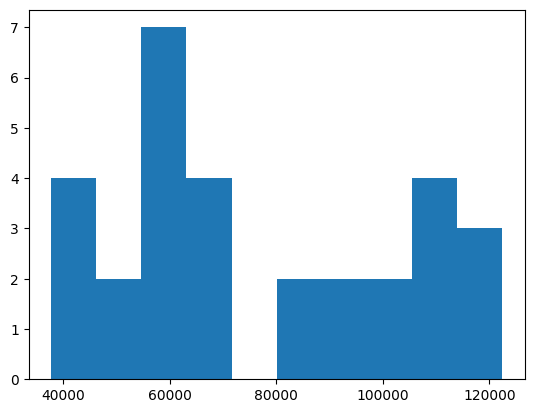

In [174]:
plt.hist(data["Salary"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e4729c88ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e4729c888b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e472994fe50>],
 'medians': [<matplotlib.lines.Line2D at 0x7e4729c88d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e4729c88310>],
 'means': []}

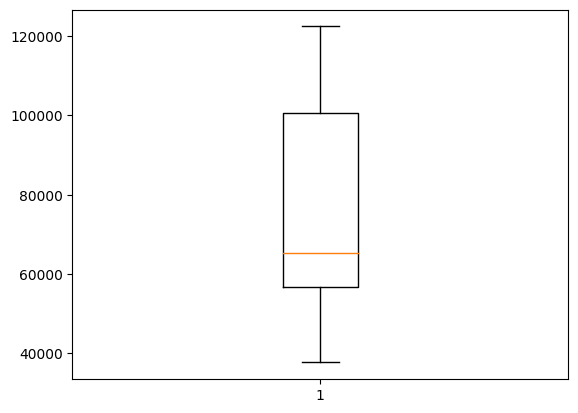

In [175]:
plt.boxplot(data["Salary"])

Text(0.5, 1.0, 'YearsExperience X Salary')

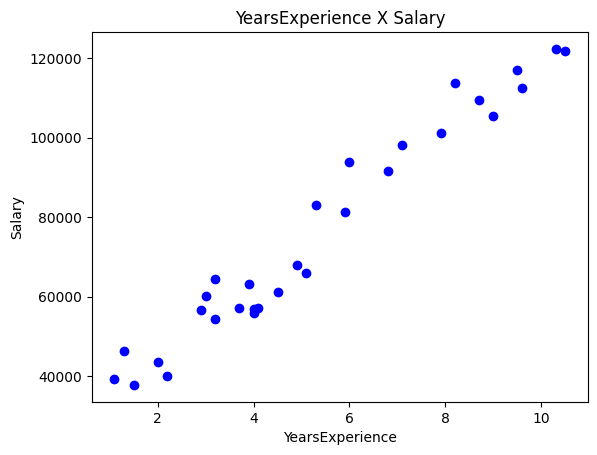

In [176]:
plt.plot(data["YearsExperience"],data["Salary"],"bo")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("YearsExperience X Salary")

In [177]:
data["Salary"].corr(data["YearsExperience"])

0.9782416184887598

In [178]:
np.corrcoef(data["Salary"],data["YearsExperience"])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [179]:
#preparing model
model = smf.ols("Salary~YearsExperience",data = data).fit()

In [180]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [181]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        20:39:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
model.conf_int(0.05)

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [183]:
pred = model.predict(data.iloc[:,0])

Text(0, 0.5, 'Salary')

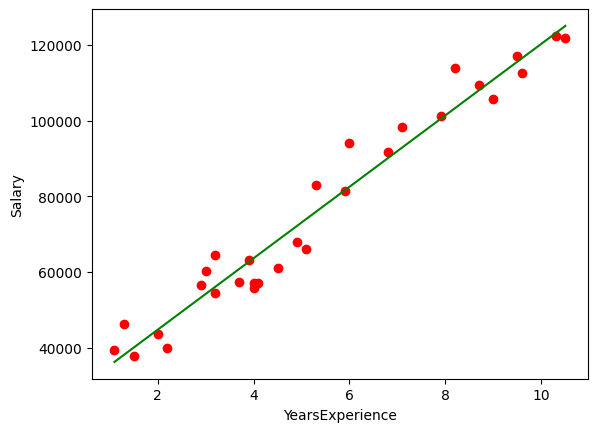

In [184]:
plt.scatter(x=data["YearsExperience"],y=data["Salary"],color="red")
plt.plot(data["YearsExperience"],pred,color="green")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [185]:
pred.corr(data.Salary)

0.9782416184887601

In [186]:
#Transforming variables for accuracy
model2 = smf.ols("Salary~np.log(YearsExperience)",data=data).fit()

In [187]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [188]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.25e-13
Time:                        20:42:38   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
print(model2.conf_int(0.01)) #99% condifence

                                    0             1
Intercept                  679.965646  29175.977894
np.log(YearsExperience)  31815.666558  49348.309362


In [190]:
pred2 = model2.predict(pd.DataFrame(data["YearsExperience"]))
pred2.corr(data.Salary)

0.924061081788264

In [191]:
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

Text(0, 0.5, 'Salary')

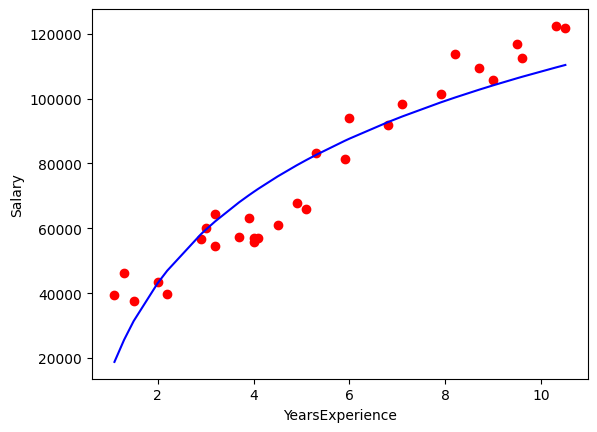

In [192]:
plt.scatter(x=data["YearsExperience"],y=data["Salary"],color="red")
plt.plot(data["YearsExperience"],pred2,color="blue")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [193]:
#exponential transformation
model3 = smf.ols("np.log(Salary)~YearsExperience",data=data).fit()

In [194]:
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [195]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           7.03e-18
Time:                        20:46:03   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
print(model3.conf_int(0.01))

                         0          1
Intercept        10.401175  10.613629
YearsExperience   0.107752   0.143153


In [197]:
pred_log = model3.predict(pd.DataFrame(data["YearsExperience"]))
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [198]:
pred3 = np.exp(pred_log)

Text(0, 0.5, 'Salary')

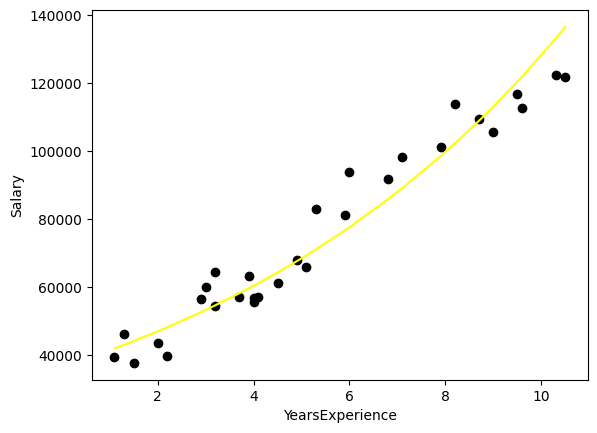

In [199]:
plt.scatter(x=data["YearsExperience"],y=data["Salary"],color="black")
plt.plot(data.YearsExperience,pred3,color="yellow")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [201]:
resid3 = pred3-data.Salary

In [202]:
time_resid = model3.resid_pearson
time_resid

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

Text(0, 0.5, 'Salary')

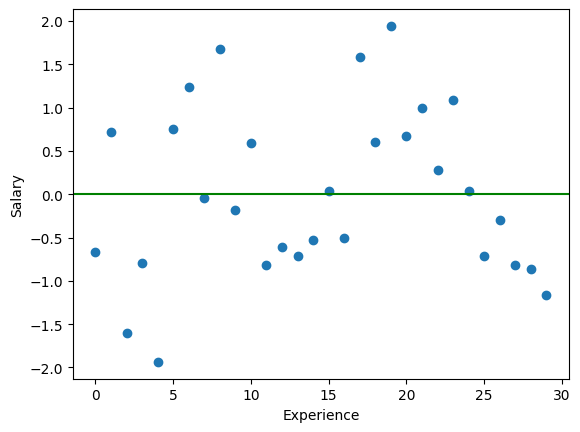

In [203]:
plt.plot(time_resid,"o")
plt.axhline(y=0,color="green")
plt.xlabel("Experience")
plt.ylabel("Salary")

Text(0, 0.5, 'actual')

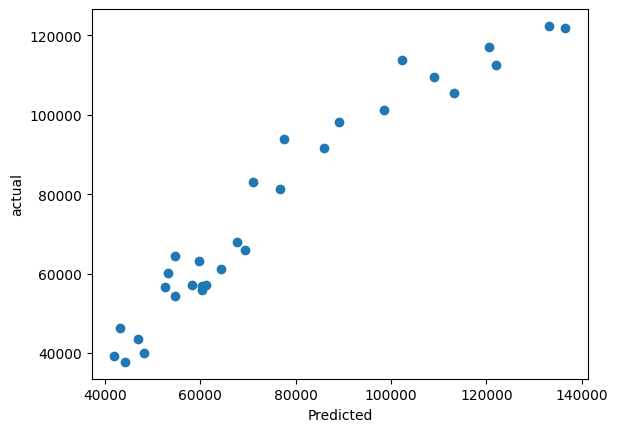

In [204]:
#visualization of predicted vs acutal values
plt.scatter(x=pred3,y=data.Salary)
plt.xlabel("Predicted")
plt.ylabel("actual")

In [205]:
#quadratic value
data["YearsExperience_sq"] = data.YearsExperience*data.YearsExperience
model_quad = smf.ols("Salary~YearsExperience+YearsExperience_sq",data=data).fit()

In [206]:
data

,YearsExperience,Salary,YearsExperience_sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [207]:
model_quad.params

Intercept             26214.932677
YearsExperience        9259.283888
YearsExperience_sq       16.392566
dtype: float64

In [208]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.59e-19
Time:                        20:53:29   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience     9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YearsExperience_sq    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
pred_quad = model_quad.predict(model_quad.params)

In [210]:
model_quad.conf_int(0.05)

,0,1
Intercept,16869.512653,35560.352701
YearsExperience,5543.405004,12975.162772
YearsExperience_sq,-295.734369,328.519502


In [211]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression


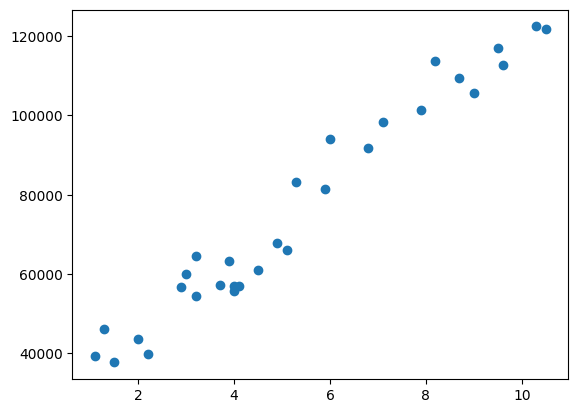

In [212]:
plt.scatter(data.YearsExperience,data.Salary)

In [213]:
model1 = LinearRegression()

In [214]:
model1.fit(data.YearsExperience.values.reshape(-1,1),data.Salary)

LinearRegression()

In [260]:
pred1 = model1.predict(data.YearsExperience.values.reshape(-1,1))

In [261]:
#rmse
model1.score(data.YearsExperience.values.reshape(-1,1),data.Salary)# 0.6700
rmse1 = np.sqrt(np.mean((pred1-data.Salary)**2)) # 32.760
model1.coef_
model1.intercept_

25792.200198668696

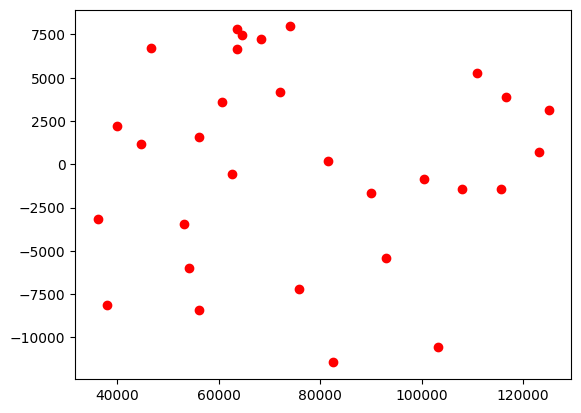

In [262]:
plt.scatter(pred1,(pred1-data.Salary),c="r")

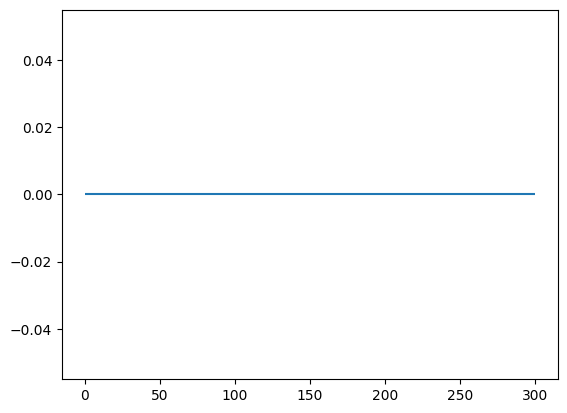

In [222]:
plt.hlines(y=0,xmin=0,xmax=300)

(array([2., 2., 2., 1., 2., 6., 3., 4., 2., 6.]),
 array([-11448.0258726 ,  -9507.42248153,  -7566.81909046,  -5626.21569939,
         -3685.61230832,  -1745.00891726,    195.59447381,   2136.19786488,
          4076.80125595,   6017.40464702,   7958.00803809]),
 <BarContainer object of 10 artists>)

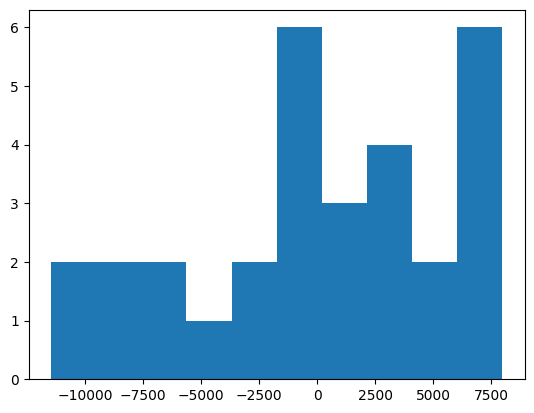

In [223]:
plt.hist(pred1-data.Salary)

In [224]:
#fitting quadratic regression
data["YearsExperience_sqrd"] = data.YearsExperience*data.YearsExperience

In [225]:
model2 = LinearRegression()
model2.fit(X = data.iloc[:,[0,2]],y=data.Salary)

LinearRegression()

In [226]:
pred2 = model2.predict(data.iloc[:,[0,2]])

In [227]:
model2.score(data.iloc[:,[0,2]],data.Salary)


0.956975168321065

In [228]:
rmse2 = np.sqrt(np.mean((pred2-data.Salary)**2))

In [229]:
model2.coef_
model2.intercept_

26214.932677059565

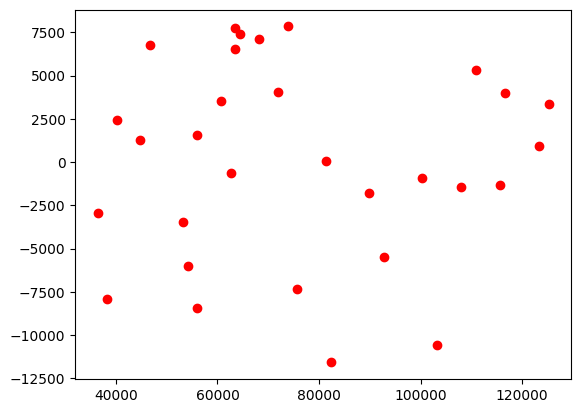

In [231]:
#visualization of residuals vs fitted values
plt.scatter(pred2,(pred2-data.Salary),c="r")

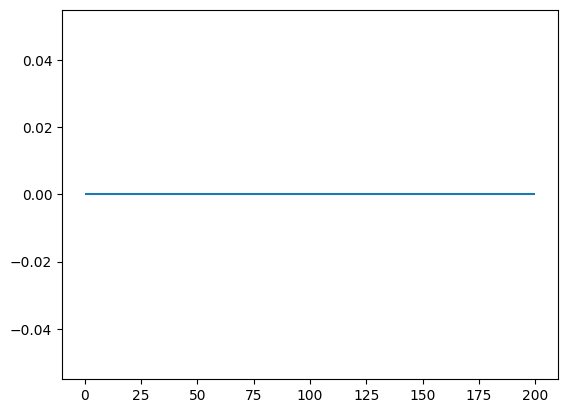

In [232]:
plt.hlines(y=0,xmin=0,xmax=200)

(array([2., 2., 2., 1., 2., 6., 3., 3., 3., 6.]),
 array([-11579.23160621,  -9637.8433299 ,  -7696.45505359,  -5755.06677728,
         -3813.67850097,  -1872.29022467,     69.09805164,   2010.48632795,
          3951.87460426,   5893.26288057,   7834.65115687]),
 <BarContainer object of 10 artists>)

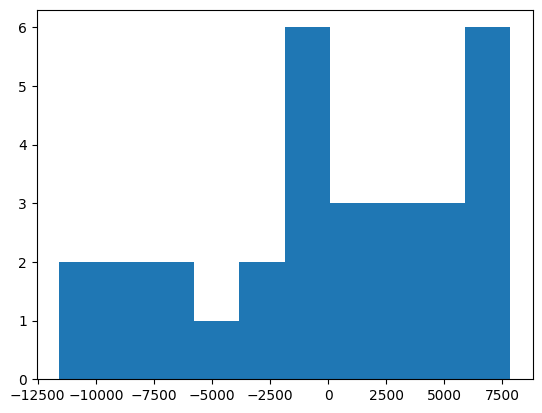

In [233]:
plt.hist(pred2-data.Salary)

In [234]:
import pylab
import scipy.stats as st

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-11579.23160621, -10568.70328032,  -8432.49900158,  -7925.2948312 ,
          -7338.39552754,  -6009.68256145,  -5490.80244851,  -3437.2825644 ,
          -2923.02004067,  -1801.94461653,  -1419.54415082,  -1311.44127464,
           -915.66454211,   -642.52922522,     52.33285105,    933.64408643,
           1274.07071874,   1567.50099842,   2409.74178358,   3372.69393997,
           3509.69729633,   3979.79691585,   4041.00924659,   5294.2855428 ,
           6557.34929099,   6773.69725209,   7102.65964195,   7372.55565853,
           7720

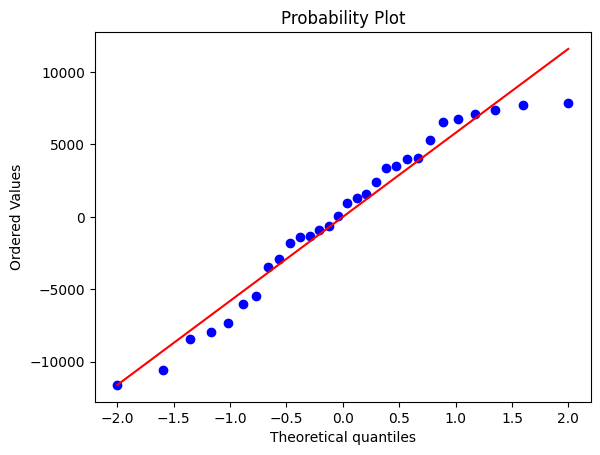

In [235]:
st.probplot(pred2-data.Salary,dist="norm",plot=pylab)


In [236]:
#preparing a model
data["Salary_sqrt"] = np.sqrt(data.Salary)

In [237]:
model3 = LinearRegression()
model3.fit(X=data.iloc[:,[0,2]],y=data.Salary_sqrt)
pred3 = model3.predict(data.iloc[:,[0,2]])

In [238]:
model3.score(data.iloc[:,[0,2]],data.Salary_sqrt)

0.953577718671803

In [239]:
rmse3 = np.sqrt(np.mean(((pred3)**2-data.Salary)**2))

In [240]:
model3.coef_
model3.intercept_

169.80875293828598

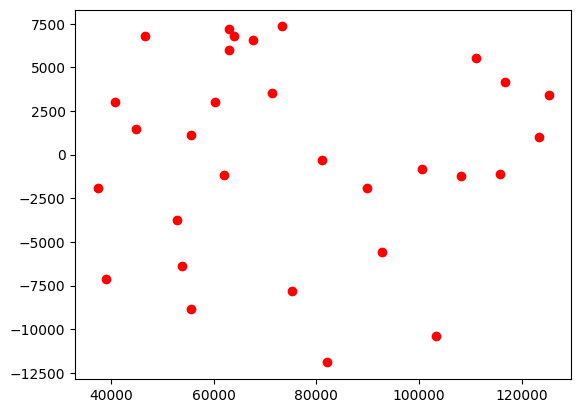

In [241]:
plt.scatter((pred3)**2,((pred3)**2-data.Salary),c="r")

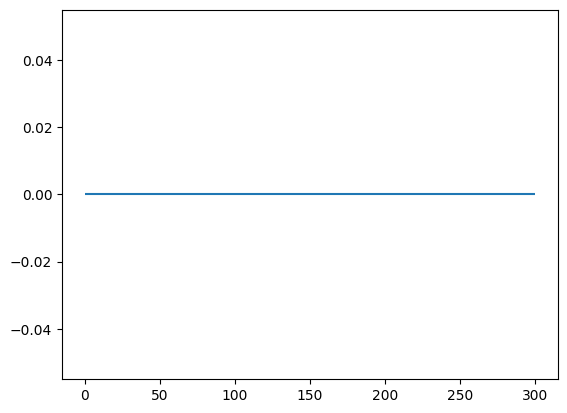

In [242]:
plt.hlines(y=0,xmin=0,xmax=300)

(array([2., 1., 3., 1., 1., 6., 4., 3., 2., 7.]),
 array([-11903.66559887,  -9979.31905209,  -8054.9725053 ,  -6130.62595852,
         -4206.27941173,  -2281.93286494,   -357.58631816,   1566.76022863,
          3491.10677541,   5415.4533222 ,   7339.79986898]),
 <BarContainer object of 10 artists>)

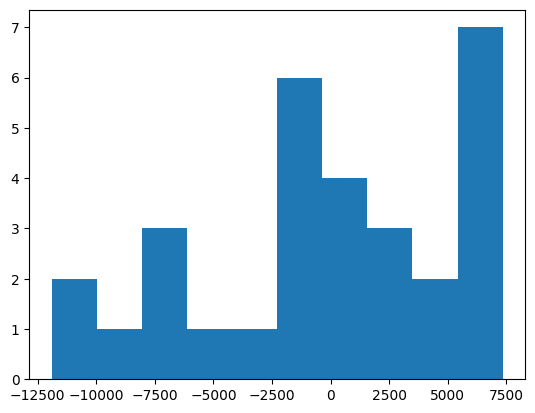

In [243]:
plt.hist((pred3)**2-data.Salary)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-11903.66559887, -10412.35581775,  -8850.17134139,  -7802.44700432,
          -7137.49206633,  -6365.24096784,  -5552.72464198,  -3756.86998393,
          -1935.62436397,  -1914.72053895,  -1207.13358311,  -1184.63606668,
          -1096.82901194,   -808.37052792,   -294.37698233,   1010.48148507,
           1149.82865861,   1443.54622547,   2989.51363219,   2997.22880675,
           3389.0400768 ,   3520.69723584,   4185.58323899,   5521.61096137,
           6007.98770764,   6550.32832533,   6806.89840384,   6818.28451061,
           7170

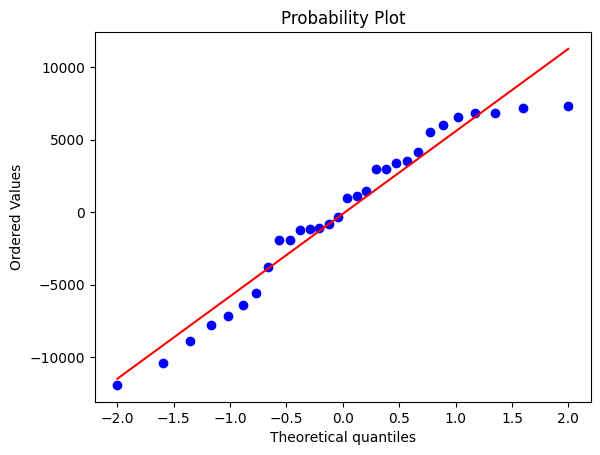

In [244]:
st.probplot((pred3)**2-data.Salary,dist="norm",plot=pylab)

In [245]:
model4 = LinearRegression()
model4.fit(X = data.YearsExperience.values.reshape(-1,1),y=data.Salary_sqrt)
pred4 = model4.predict(data.YearsExperience.values.reshape(-1,1))

In [247]:
#adjusting r squared values
model4.score(data.YearsExperience.values.reshape(-1,1),data.Salary_sqrt)
rmse4 = np.sqrt(np.mean(((pred4)**2-data.Salary)**2))

In [248]:
model4.coef_
model4.intercept_

180.70022140543102

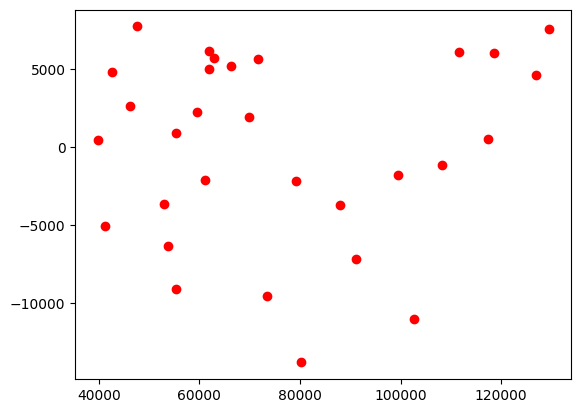

In [249]:
plt.scatter((pred4)**2,((pred4)**2-data.Salary),c="r")

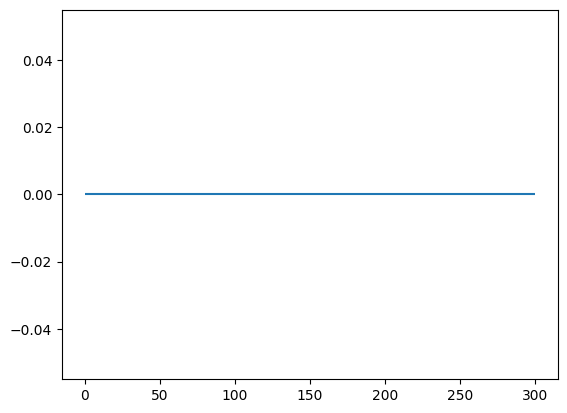

In [250]:
plt.hlines(y=0,xmin=0,xmax=300)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-13828.69028846, -11050.86024821,  -9592.87606245,  -9087.7927052 ,
          -7188.79486389,  -6386.38770647,  -5047.25654489,  -3716.2247755 ,
          -3666.45744854,  -2214.31520188,  -2099.92727082,  -1795.3008483 ,
          -1129.42246716,    442.25167088,    499.84027951,    912.2072948 ,
           1904.45347807,   2254.01864794,   2619.74762985,   4617.48739174,
           4822.50926219,   5007.32752837,   5171.87910997,   5628.15169638,
           5735.40083327,   6005.93139855,   6113.66227   ,   6170.32752837,
           7579

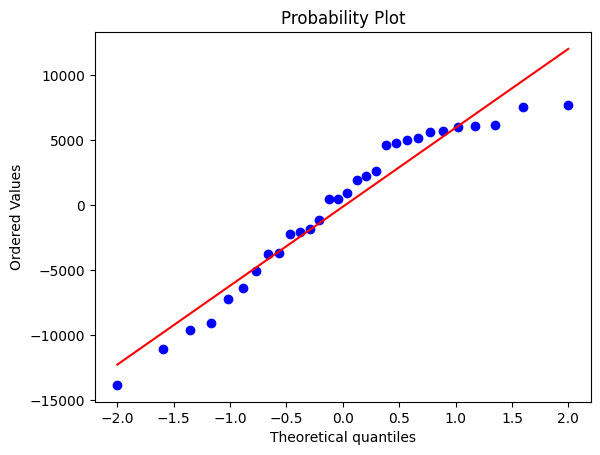

In [251]:
st.probplot((pred4)**2-data.Salary,dist="norm",plot=pylab)

(array([1., 2., 1., 2., 3., 4., 3., 3., 4., 7.]),
 array([-13828.69028846, -11672.72400793,  -9516.75772739,  -7360.79144686,
         -5204.82516632,  -3048.85888579,   -892.89260525,   1263.07367528,
          3419.03995582,   5575.00623635,   7730.97251689]),
 <BarContainer object of 10 artists>)

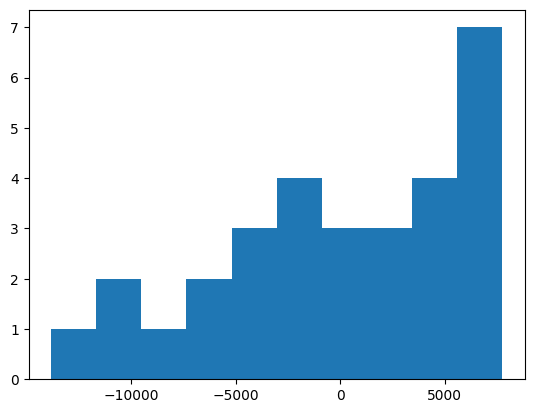

In [252]:
plt.hist((pred4)**2-data.Salary)

In [166]:
data.shape

(21, 5)

In [167]:
data_sal = pd.read_csv("/content/salary_data_SLR.csv")

In [169]:
data_sal.shape

(30, 2)